## **Binary Classification**

Review on the concepts. Pay special attention the cost function used in binary classification.

In [6]:
## binary problem
## y_true = 0
## p_hat = 0.1
import numpy as np

## binary cross-entropy loss function
def binary_crossentropy(y_true, p_hat):
  return -(y_true*(np.log(p_hat)) + (1-y_true)*np.log(1-p_hat))

In [7]:
## fairly accurate prediction
y_true = 0
p_hat = 0.1

binary_crossentropy(y_true, p_hat)

0.10536051565782628

In [9]:
## bad prediction
y_true = 0
p_hat = 0.9999999

binary_crossentropy(y_true, p_hat)

16.118095651484676

In [11]:
## binary_crossentropy cost function
## the average of the loss
def binary_crossentropy_cost(y_true, p_hat):
  return -np.mean(y_true*(np.log(p_hat)) + (1-y_true)*np.log(1-p_hat))

In [12]:
## model to predict sentiment (satisfied, unsatisfied)
y_true = np.array([1,1,0,0])
p_hat = np.array([0.9, 0.99, 0.05, 0.51])

binary_crossentropy_cost(y_true, p_hat)

0.2200135084440858

In [13]:
## binary_crossentropy is NOT a  quadratic formula
## cost is NOT convex
## the gradient being zero is at multiple places of the w
## gradient descent to get w
## iterative method
## max_iter, tol, momentum, learning_rate (step size)

In [14]:
## how about regularization
## we can add a penalty
## ||w||_2^2
def binary_crossentropy_cost(y_true, p_hat, w, alpha):
  cost = -np.mean(y_true*(np.log(p_hat)) + (1-y_true)*np.log(1-p_hat))
  penalty = alpha*np.linalg.norm(w)**2
  return cost + penalty

In [16]:
## Logistic Regression
w = np.array([0, 20, -2])
y_true = np.array([1,1,0,0])
p_hat = np.array([0.9, 0.99, 0.05, 0.51])

binary_crossentropy_cost(y_true, p_hat, w, 1)

404.2200135084441

## **Example**

In [17]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [20]:
## y value counts
## check for imbalance
df.y.value_counts() / len(df)

,count
y,
no,0.88476
yes,0.11524


In [28]:
## Create X and y
X = df.drop('y', axis = 1)
y = df.y.map({'no': 0, 'yes': 1})

In [29]:
## encode
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [31]:
## split 80% and 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=630)

In [45]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

## instance
## trying to make slopes as close to zero as possible
log_reg = LogisticRegression(solver = "liblinear", C = 0.001, penalty = "l1") ## binary_crossentropy + penalty

## liblinear optimizer (slower)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [46]:
pd.DataFrame(log_reg.coef_.T, index = X.columns)

,0
age,-0.061625
balance,0.000006
day,-0.017536
duration,0.002446
campaign,0.000000
pdays,0.001240
previous,0.000000
job_blue-collar,0.000000
job_entrepreneur,0.000000
job_housemaid,0.000000


In [42]:
## as the balance increases by $1, the log-odds of getting an acct, increase by 0.000019
## as the balance increases by $1, the odds of getting an acct change by a factor of exp(0.000019)

In [48]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

y_pred = log_reg.predict(X_test) ## 50% as cutoff
print(balanced_accuracy_score(y_test, y_pred))

0.5446666824096158


In [49]:
accuracy_score(y_test, y_pred)

0.8895027624309392

In [61]:
## Tensorflow
## 1-hidden layer 64 neurons (tanh as activation in the hidden layer)
## output: sigmoid
## loss: binary_crossentropy
## optimizer: gradient descent "Adam"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

## skeleton NN
model = Sequential()
## add input layer
model.add(Input(shape = (X_train.shape[1],)))
## add 1st Hidden
model.add(Dense(64, activation = "tanh", kernel_regularizer=L2())) ## put pressure so that weights are close to zero
model.add(Dropout(0.2)) ## randomly drop (zero out) some weights
## add output layer
model.add(Dense(1, activation = "sigmoid"))

In [62]:
## summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
## compile
model.compile(loss = "binary_crossentropy", optimizer = Adam(), metrics = ["accuracy"])

In [64]:
## save your cost function in an object
history = model.fit(X_train, y_train, epochs = 60, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/60
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6921 - loss: 0.9946 - val_accuracy: 0.8685 - val_loss: 0.5342
Epoch 2/60
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8685 - loss: 0.5106 - val_accuracy: 0.8807 - val_loss: 0.4240
Epoch 3/60
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8749 - loss: 0.4293 - val_accuracy: 0.8818 - val_loss: 0.3905
Epoch 4/60
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8859 - loss: 0.3943 - val_accuracy: 0.8818 - val_loss: 0.3703
Epoch 5/60
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8835 - loss: 0.3725 - val_accuracy: 0.8829 - val_loss: 0.3638
Epoch 6/60
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8886 - loss: 0.3713 - val_accuracy: 0.8829 - val_loss: 0.3561
Epoch 7/60
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8789 - loss: 0.3735 - val_accuracy: 0.8829 - val_loss: 0.3418
Epoch 8/60
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8925 - loss: 0.3354 - val_accuracy: 0.

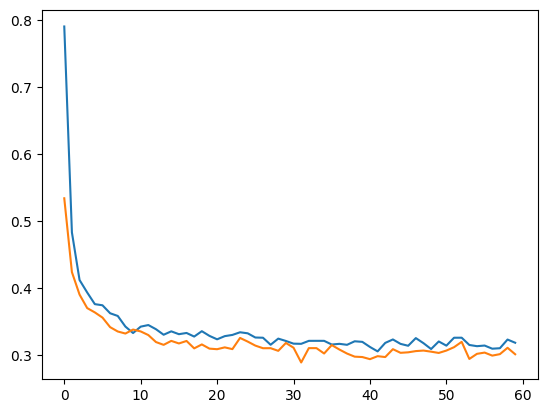

In [65]:
## plot the error curves
## learning curves
## is the model learning?
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) ## binary cross entropy - no regularization - training
plt.plot(history.history['val_loss']) ## binary cross entropy - test

In [67]:
## predictions
## by default tensorflow does not output predicted values
yhat1 =( model.predict(X_test) > 0.5).astype("int")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [69]:
# prompt: what is the optimal threshold on model

from sklearn.metrics import roc_curve, auc
y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Optimal threshold: 0.0914900079369545
